# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
# I modeled my analysis after the following github repository to facilitate me completing this analysis. My interpretation of the results are
# my independant analysis
#
#https://github.com/TheeChris/springboard/blob/master/EDA_human_temperature/sliderule_dsi_inferential_statistics_exercise_1.ipynb#
#
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## set random seed for replication
#np.random.seed(80)

# set graph style
sns.set_style('darkgrid')

# load the dataset into a dataframe
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of the body temperatures normal ?

In [18]:
# separate male and female 
male = df[df.gender == 'M']
female = df[df.gender == 'F']

# Summary stats
pop_mean = np.mean(df.temperature)
pop_std_dev = np.std(df.temperature)
# Male stats
male_mean = np.mean(male.temperature)
male_std_dev = np.std(male.temperature)
# Female stats
female_mean = np.mean(female.temperature)
female_std_dev = np.std(female.temperature)

print(f' Body Temperature Stats')
print(f' Mean Temp - Population: {pop_mean:.2f}   Male: {male_mean:.2f}   Female: {female_mean:.2f}')
print(f' Stnd Dev  - Population: {pop_std_dev:.2f}    Male: {male_std_dev:.2f}    Female: {female_std_dev:.2f}')
print(f' Tot Obs.  - Population: {len(df):.0f}     Male: {len(male):.0f}      Female: {len(male):.0f}')


 Body Temperature Stats
 Mean Temp - Population: 98.25   Male: 98.10   Female: 98.39
 Stnd Dev  - Population: 0.73    Male: 0.69    Female: 0.74
 Tot Obs.  - Population: 130     Male: 65      Female: 65


Commentary: The mean and standard deviation of the male and female population are very close to the population mean and standard deviation.

C:\Users\522147\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


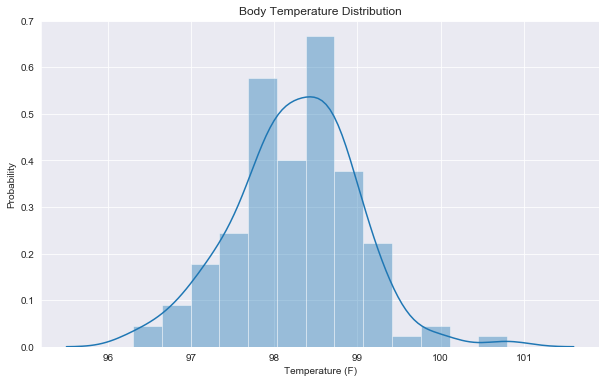

In [21]:
# Create a PDF of the population body temperatures
plt.figure(figsize=(10,6))
_ = sns.distplot(df.temperature)
_ = plt.title('Body Temperature Distribution')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
plt.show()

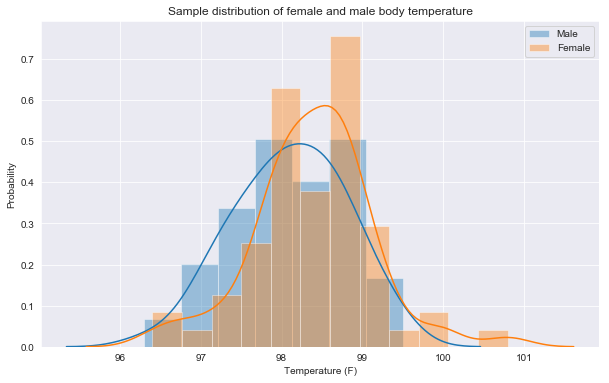

In [25]:
# PDF plot of temperature data by sex
plt.figure(figsize=(10,6))

ax = sns.distplot(male.temperature, label='Male')
sns.distplot(female.temperature, ax=ax, label='Female')
ax = plt.title('Sample distribution of female and male body temperature')
ax = plt.xlabel('Temperature (F)')
ax = plt.ylabel('Probability')
ax = plt.legend()
plt.show()

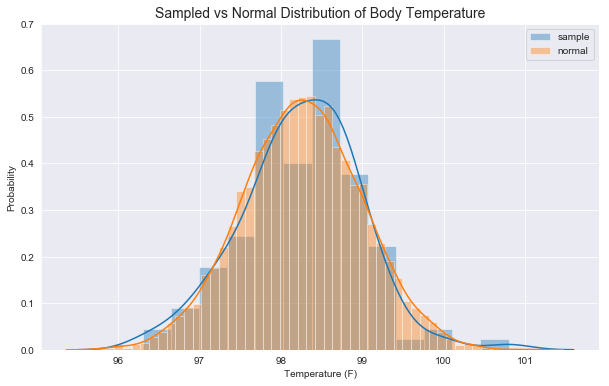

In [28]:
# Population Distribution vs Sample Distribtion
plt.figure(figsize=(10,6))
ax1 = sns.distplot(df.temperature, label='sample')
sns.distplot(np.random.normal(pop_mean, pop_std_dev, 10000), ax=ax1, label='normal')
ax1 = plt.title('Sampled vs Normal Distribution of Body Temperature', fontsize=14)
ax1 = plt.xlabel('Temperature (F)')
ax1 = plt.ylabel('Probability')
ax1 = plt.legend()
plt.show()

Commentary: The distribution plot of the sample reasonably matches the distributon of the population

In [29]:
# ECDF function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

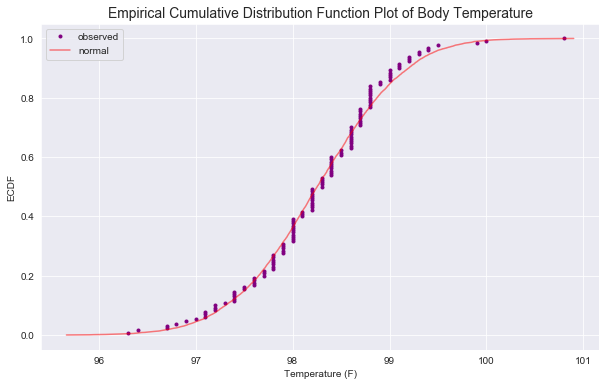

In [32]:
# plot temperature data as an empirical distribution function (ECDF)
plt.figure(figsize=(10,6))

temps, y = ecdf(df.temperature)
_ = plt.plot(temps, y, label='observed', color='purple', marker='.', linestyle='None')

# compare to a Normal ECDF
# pop mean and standard deviation previously calculated
samples = np.random.normal(pop_mean, pop_std_dev, size=10000)
x2, y2 = ecdf(samples)

_ = plt.plot(x2, y2, label='normal', color='red', alpha=0.5)
_ = plt.title('Empirical Cumulative Distribution Function Plot of Body Temperature', fontsize=14)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend()

plt.show()

Commentary: The ECDF of the observed and normal observed model temperatures are in line with each other

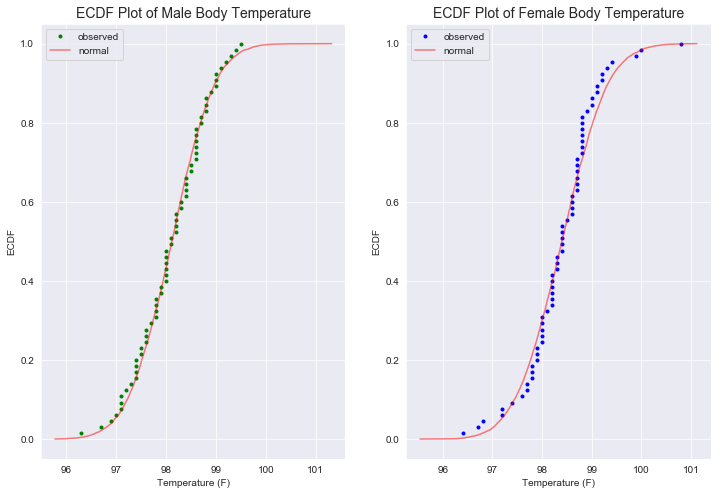

In [36]:
# Calc ECDFsffor Male and Female population
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# plot male temperature data as ECDF
temps_m, y_m = ecdf(male.temperature)

ax2 = plt.subplot(1,2,1)
plt.plot(temps_m, y_m, label='observed', color='green', marker='.', linestyle='None')

# compare to a Normal ECDF
samples_m = np.random.normal(male_mean,male_std_dev, size=10000)
x2_m, y2_m = ecdf(samples_m)
plt.plot(x2_m, y2_m, label='normal', color='red', alpha=0.5)
plt.title('ECDF Plot of Male Body Temperature', fontsize=14)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.legend()


# plot female temperature data as an empirical distribution function (ECDF)
temps_f, y_f = ecdf(female.temperature)

ax3 = plt.subplot(1,2,2, sharey=ax2)
plt.plot(temps_f, y_f, label='observed', color='blue', marker='.', linestyle='None')

# compare to a Normal ECDF
samples_f = np.random.normal(female_mean,female_std_dev, size=10000)
x2_f, y2_f = ecdf(samples_f)
plt.plot(x2_f, y2_f, label='normal', color='red', alpha=0.5)
plt.title('ECDF Plot of Female Body Temperature', fontsize=14)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.legend()
plt.show()


Commentary: Both the male and femal ECDF of the observed and normal observed model temperatures are in line with each other

In [37]:
# create function to calculate quantitative normality fit
def normality_test(data, alpha):
    k2, p = stats.normaltest(data)
    print("p = {:.3f}".format(p))
    
    # null hypothesis: the data is normally distributed
    if p < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    
# test normality of all temperature data
print('All Temperature Data')
normality_test(data=df.temperature, alpha=0.05)
print('-'*30)
print('Female Temperature Data')
normality_test(data=female.temperature, alpha=0.05)
print('-'*30)
print('Male Temperature Data')
normality_test(data=male.temperature, alpha=0.05)

All Temperature Data
p = 0.259
The null hypothesis cannot be rejected
------------------------------
Female Temperature Data
p = 0.094
The null hypothesis cannot be rejected
------------------------------
Male Temperature Data
p = 0.640
The null hypothesis cannot be rejected


### Is the sample size large ? Are the observations independent ?

In [50]:
# Sample size
print(f' Tot Obs.  - Population: {len(df):.0f}     Male: {len(male):.0f}      Female: {len(male):.0f}')

# calculate sample size needed for 95% confidence interval & 10% margin of error
m_e = 0.1
z = 1.96
p = 0.5
n_needed = ((np.sqrt(p * (1-p))*z)/m_e)**2
print(f'Sampled Needed for 95% Confidence Level and 5% Margin of error: {n_needed:.0f} obs')

 Tot Obs.  - Population: 130     Male: 65      Female: 65
Sampled Needed for 95% Confidence Level and 5% Margin of error: 96 obs


### Is the true population mean really 98.6 degrees F ?

In [51]:
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# create empty array for bootstrapping
bs_replicates = np.empty(10000)

# bootstrap 100,000 replicate sample means
for i in range(10000):
    bs_replicates[i] = bootstrap_replicates(data=df.temperature)

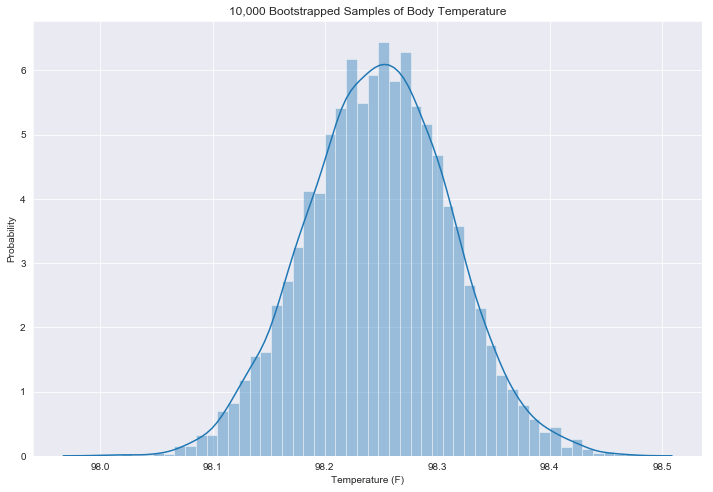

In [52]:
# draw a PDF of the sample means
plt.figure(figsize=(12,8))
_ = sns.distplot(bs_replicates)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
_ = plt.title('10,000 Bootstrapped Samples of Body Temperature')
plt.show()

In [54]:
# calculate 95% confidence interval
np.percentile(bs_replicates, [2.5,97.5])

array([98.12382692, 98.37386538])

In [61]:
# sampling distribution mean and standard deviation
mu_xbar = 98.6
theta = pop_std_dev / np.sqrt(len(df))

# model a normal distribution with the sampling distribution
sample_distro = np.random.normal(mu_xbar, theta, 10000)

# define a 95% confidence interval
print(f'95% confidence intervals: {np.percentile(sample_distro, [2.5, 97.5])}')
print(f'Theta: {theta:02f}')

95% confidence intervals: [98.47424339 98.72785492]
Theta: 0.064057


Commentary: The 98.6 degrees expected temp falls inside the 95% confidence interval

In [63]:
# calucalate the difference of means, assuming a mean of 98.6 for the population
difference = pop_mean - 98.6

# calculate the z-score
z_score = difference / theta
print('z-score =', z_score)

z-score = -5.475925202078116


In [ ]:
# convert z-score to p-value
p = stats.norm.cdf(z_score)
p

In [64]:
def t_stat(data, pop_mu):
    '''
    Define a t-statistic from an array.
    data = array of data
    pop_mu = population mean of nul hypothesis
    
    n = sample size
    v = variance
    d = difference of means
    t = t-statistic
    p = p-value
    '''
    n = len(data)
    v = np.var(data, ddof=1)
    d = np.mean(data) - pop_mu
    t = d / np.sqrt(v / float(n))
    p = stats.norm.cdf(t)
    
    return t,p
    
t_stat, pval = t_stat(df.temperature, 98.6)
print('t-statistic =', t_stat)
print('p-value =', pval)

t-statistic = -5.454823292364079
p-value = 2.45107850705669e-08


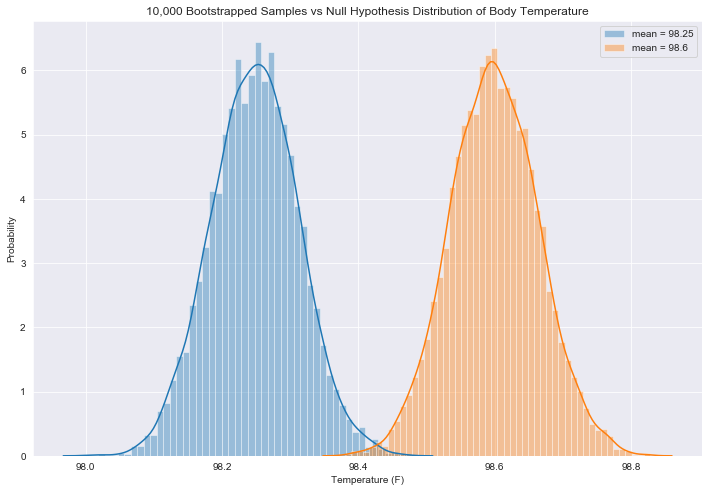

In [66]:
# plot the bootstrapped sample means vs the null hypothesis
plt.figure(figsize=(12,8))

# draw the distribution of the sample means
_ = sns.distplot(bs_replicates, label='mean = 98.25')

# draw the distribution of the null hypothesis
_ = sns.distplot(sample_distro, label='mean = 98.6')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability')
_ = plt.title('10,000 Bootstrapped Samples vs Null Hypothesis Distribution of Body Temperature')
_ = plt.legend()
plt.show()


In [67]:
# generate 10 small random samples and find the mean z-score
small_zscores = np.empty(10)
p_value = np.empty(10)

for i in range(10):
    # generate a small random sample, n=10
    small_sample = np.random.choice(df.temperature, size=10)
    small_diff = np.mean(small_sample) - 98.6
    small_theta = np.std(small_sample)/np.sqrt(10)

    small_zscores[i] = small_diff / small_theta
    p_value[i] = stats.norm.cdf(small_zscores[i])
    print('z-score: {0:.4f} | p-value: {1:.4f}'.format(small_zscores[i], p_value[i]))

print('Mean Small Sample z-score = {:.3f}'.format(np.mean(small_zscores)))
print('Range of p-values: ({0:.5f} to {1:.5f})'.format(min(p_value), max(p_value)))

z-score: -1.8453 | p-value: 0.0325
z-score: -1.8058 | p-value: 0.0355
z-score: -1.6359 | p-value: 0.0509
z-score: -2.8304 | p-value: 0.0023
z-score: -1.2555 | p-value: 0.1046
z-score: -3.2228 | p-value: 0.0006
z-score: -2.0702 | p-value: 0.0192
z-score: -2.3178 | p-value: 0.0102
z-score: -1.8981 | p-value: 0.0288
z-score: -3.1514 | p-value: 0.0008
Mean Small Sample z-score = -2.203
Range of p-values: (0.00063 to 0.10464)


In [68]:
# generate 10 small random samples and find the mean t-statistic
small_ts = np.empty(10)
p_value = np.empty(10)

for i in range(10):
    # generate a small random sample, n=10
    small_sample = np.random.choice(df.temperature, size=10)
    
    small_ts[i], p_value[i] = stats.ttest_1samp(small_sample, 98.6)
    print('t-statistic: {0:.4f} | p-value: {1:.4f}'.format(small_ts[i], p_value[i]))

print('Mean Small Sample t-statistic = {:.3f}'.format(np.mean(small_ts)))
print('Range of p-values: ({0:.5f} to {1:.5f})'.format(min(p_value), max(p_value)))

t-statistic: -2.6759 | p-value: 0.0254
t-statistic: -0.8042 | p-value: 0.4420
t-statistic: -3.0729 | p-value: 0.0133
t-statistic: 0.3305 | p-value: 0.7486
t-statistic: -0.5333 | p-value: 0.6067
t-statistic: -2.8936 | p-value: 0.0178
t-statistic: -2.8376 | p-value: 0.0195
t-statistic: -0.7417 | p-value: 0.4772
t-statistic: -2.9763 | p-value: 0.0155
t-statistic: -3.6742 | p-value: 0.0051
Mean Small Sample t-statistic = -1.988
Range of p-values: (0.00512 to 0.74859)


At what temperature would be consider someone's temperature abnormal ?

In [69]:
# calculate 95% confidence interval for bootstrapped mean
ci_95 = np.percentile(bs_replicates, [2.5, 97.5])

# calculate 99% confidence interval
ci_99 = np.percentile(bs_replicates, [0.5, 99.5])

print('With a 95% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(ci_95[0],ci_95[1]))
print('-'*100)
print('With a 99% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(ci_99[0],ci_99[1]))

With a 95% Confidence Interval:
Abnormal temperatures would fall below 98.12 and above 98.37
----------------------------------------------------------------------------------------------------
With a 99% Confidence Interval:
Abnormal temperatures would fall below 98.09 and above 98.42


In [70]:
# calculate frequentist confidence intervals
fci_95 = np.percentile(df.temperature, [2.5, 97.5])
fci_99 = np.percentile(df.temperature, [0.5, 99.5])

print('With a 95% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(fci_95[0],fci_95[1]))
print('-'*100)
print('With a 99% Confidence Interval:')
print('Abnormal temperatures would fall below {0:.2f} and above {1:.2f}'.format(fci_99[0],fci_99[1]))

With a 95% Confidence Interval:
Abnormal temperatures would fall below 96.72 and above 99.48
----------------------------------------------------------------------------------------------------
With a 99% Confidence Interval:
Abnormal temperatures would fall below 96.36 and above 100.28


Is ther a significant difference between males and females in their normal temperature ?

In [71]:
male_bs = np.empty(10000)

for i in range(10000):
    male_bs[i] = bootstrap_replicates(male.temperature)

female_bs = np.empty(10000)

for i in range(10000):
    female_bs[i] = bootstrap_replicates(female.temperature)

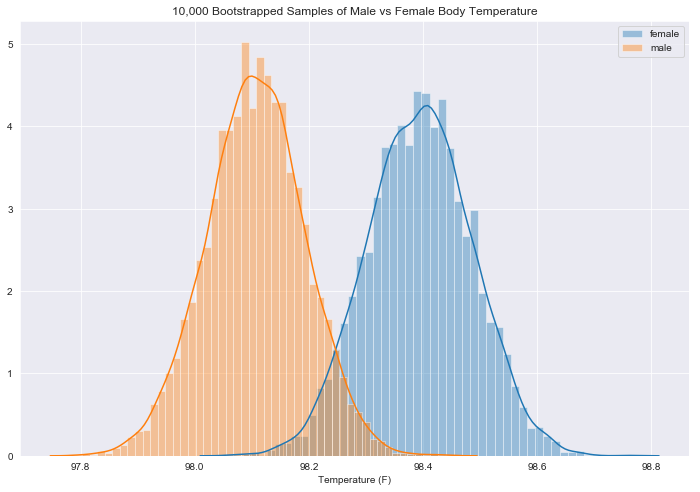

In [72]:
# plot the bootstrapped female vs male means
plt.figure(figsize=(12,8))

# draw the distribution of the sample means
ax5 = sns.distplot(female_bs, label='female')

# draw the distribution of the null hypothesis
sns.distplot(male_bs, label='male', ax=ax5)
ax5 = plt.xlabel('Temperature (F)')
ax5 = plt.title('10,000 Bootstrapped Samples of Male vs Female Body Temperature')
ax5 = plt.legend()
plt.show()

In [73]:
# calculate Pearson correlation coefficent
print('Pearson Correlation Coefficient: {:.4f}'.format(stats.pearsonr(female_bs, male_bs)[0]))

Pearson Correlation Coefficient: -0.0101


In [74]:
# Calculate mean and standard deviation male bootstrap samples
male_bs_mu = np.mean(male_bs)
male_bs_s = np.std(male_bs)

# Calculate mean and standard deviation female bootstrap samples
female_bs_mu = np.mean(female_bs)
female_bs_s = np.std(female_bs)

# calculate difference in means
mean_diff_bs = female_bs_mu - male_bs_mu

# calculate the Standard Error of means
std_diff_bs = np.sqrt((female_bs_s**2 / len(female_bs)) + (male_bs_s**2 / len(male_bs)))

# Generate a normal distribution assuming the null hypothesis
diff_normal_bs = np.random.normal(0, std_diff_bs, 10000)
                          
#Calculate the 95% Confidence interval
print('95% confidence interval: {}'.format(np.percentile(diff_normal_bs, [2.5,97.5])))

#calculate the z-score
z_score = (mean_diff_bs - 0) / std_diff_bs
print('Difference of means: {:.4f}'.format(mean_diff_bs))
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistic
t_stat, p = stats.ttest_ind(female_bs, male_bs)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

95% confidence interval: [-0.00247362  0.00243973]
Difference of means: 0.2878
z-score: 229.50
p-value: 0.0000
t-statistic = 229.48
p-value = 0.0000


In [75]:
# Calculate mean and standard deviation of male samples
male_mu = np.mean(male.temperature)
male_s = np.std(male.temperature)

# Calculate mean and standard deviation of female samples
female_mu = np.mean(female.temperature)
female_s = np.std(female.temperature)

# calculate difference in means
mean_diff = female_mu - male_mu

# calculate the Standard Error of means
std_diff = np.sqrt((female_s**2 / len(female.temperature)) + (male_s**2 / len(male.temperature)))

# Generate a normal distribution with the sample data
diff_normal_sample = np.random.normal(mean_diff, std_diff, 10000)

# Generate a normal distribution assuming the null hypothesis
diff_normal = np.random.normal(0, std_diff, 10000)
                          
#Calculate the 95% Confidence interval
print('Normal 95% confidence interval: {}'.format(np.percentile(diff_normal_sample, [2.5,97.5])))
print('Normal 95% confidence interval: {}'.format(np.percentile(diff_normal, [2.5,97.5])))
print('Difference of means: {:.4f}'.format(mean_diff))

#calculate the z-score
z_score = (mean_diff - 0) / std_diff
print('z-score: {:.2f}'.format(z_score))
print('p-value: {:.4f}'.format(stats.norm.cdf(0-z_score)))

# calculate t-statistics
t_stat, p = stats.ttest_ind(female.temperature, male.temperature)
print('t-statistic = {0:.2f}\np-value = {1:.4f}'.format(t_stat,p))

Normal 95% confidence interval: [0.04539924 0.5374167 ]
Normal 95% confidence interval: [-0.24783155  0.24585628]
Difference of means: 0.2892
z-score: 2.30
p-value: 0.0106
t-statistic = 2.29
p-value = 0.0239


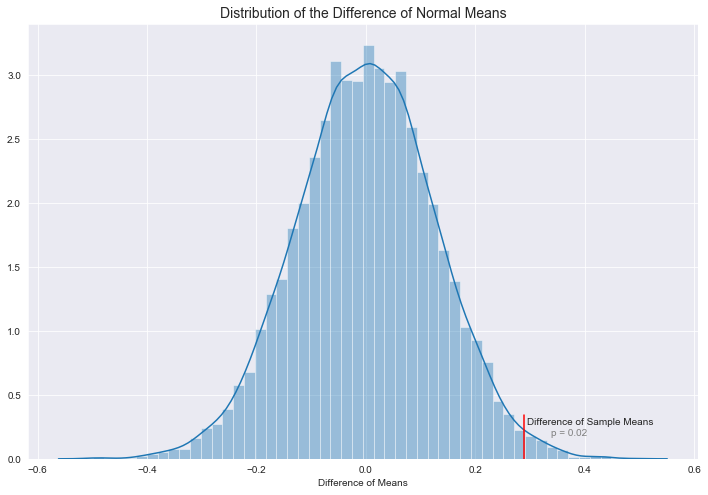

In [77]:
# plot the distribution of the difference of means assuming null hypothesis
plt.figure(figsize=(12,8))

_ = sns.distplot(diff_normal)
_ = plt.axvline(mean_diff, ymax=0.1, color='r')
_ = plt.annotate('Difference of Sample Means', xy=(mean_diff+0.005,0.27))
_ = plt.annotate('p = 0.02', xy=(mean_diff+0.05, 0.18), color='gray')

plt.xlabel('Difference of Means')
plt.title('Distribution of the Difference of Normal Means', fontsize=14)
plt.show()